# Case SEMANTIX - Lucas Costa e Lima
lucascosta816@gmail.com


In [0]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [0]:
bank_data = pd.read_csv("/content/bank-full.csv", sep=";")

In [0]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1 - Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?





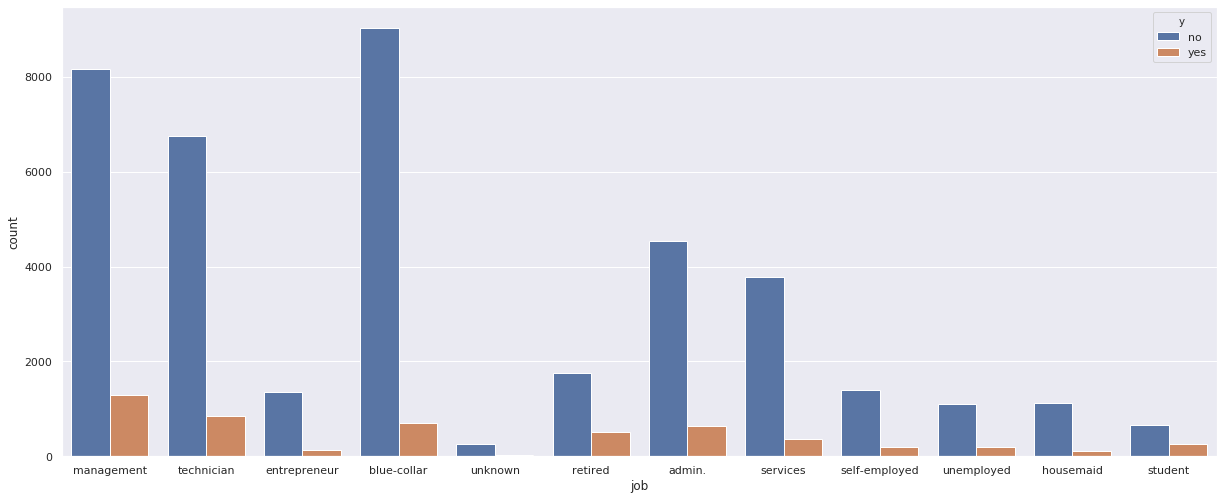

In [0]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.countplot(x="job", hue="y", data=bank_data)

In [0]:
LOANS = 0
for loan, worker in zip(bank_data['y'], bank_data['job']):
  if loan == 'yes' and worker == 'management':
    LOANS += 1

print(LOANS)

1301


In [0]:
bool_mask_loans = [bank_data['y'] == 'yes']
mask_loans = np.array(bool_mask_loans)*1

In [0]:
total_loans = np.sum(mask_loans)
print(total_loans)
print(LOANS/total_loans)

5289
0.2459822272641331


## 1 - Resposta
É possível perceber pelo histograma ponderado pela resposta ao empréstimo que os trabalhadores da classe *Manegement* são os que mais realizam empréstimos. Analíticamente, eles realizam 1301 do total de 5289 realizados, aproximdamente $24.60\%$ dos empréstimos.

# 2 - Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

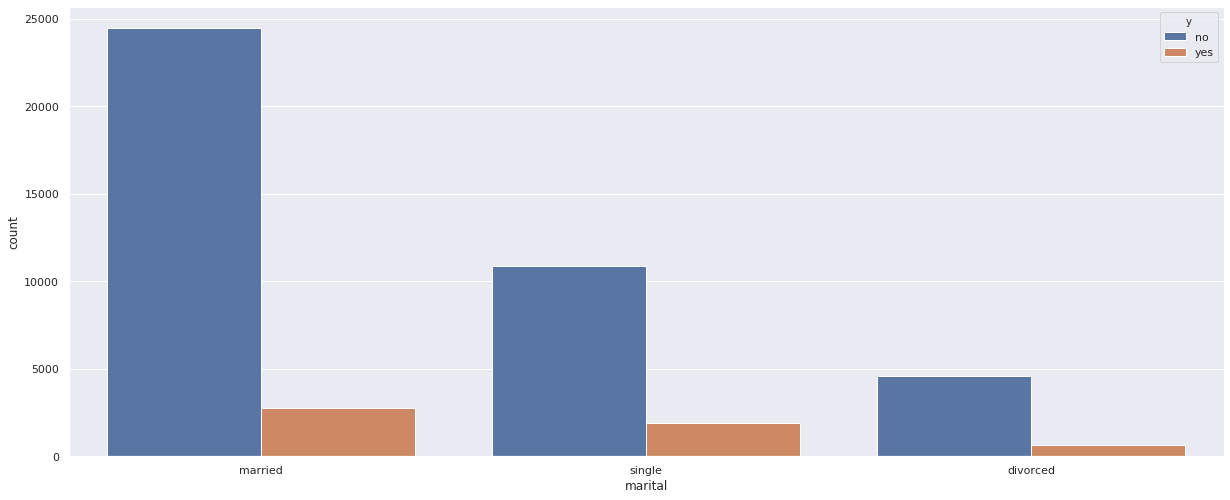

In [0]:
ax = sns.countplot(x="marital", hue="y", data=bank_data)

É possível notar que, proporcionalmente, os solteiros aderem mais aos empréstimos que os casados, entretanto, graficamente não há como mensurar tal representatividade. A falta de escala impede a análise dos divorciados também. Por isso, para o caso acima e para os subsequentes, analisaremos as porcentagens.

In [0]:
def PercentileCalc(feature, feature_name):
  TOTAL = 45211
  feature = bank_data[feature_name]
  feature = np.reshape(np.array(feature), (-1,1))

  LE = LabelEncoder()
  LE.fit(feature)
  LE_feature = LE.fit_transform(feature)

  OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
  feature_OH = OH_encoder.fit_transform(np.reshape(LE_feature, (-1,1)))

  classes = list(LE.classes_)


  feature_masked = feature_OH[bool_mask_loans]
  feature_sum = np.sum(feature_masked, axis=0)/TOTAL

  normalized_sum = feature_sum/feature_sum.sum()
  
  dictionary = dict(zip(classes, normalized_sum.T))
  return(dictionary)


In [0]:
def PlotDict(dictionary, feature_name):
  plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
  plt.xlabel(feature_name)
  plt.xticks(range(len(dictionary)), list(dictionary.keys()))
  plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


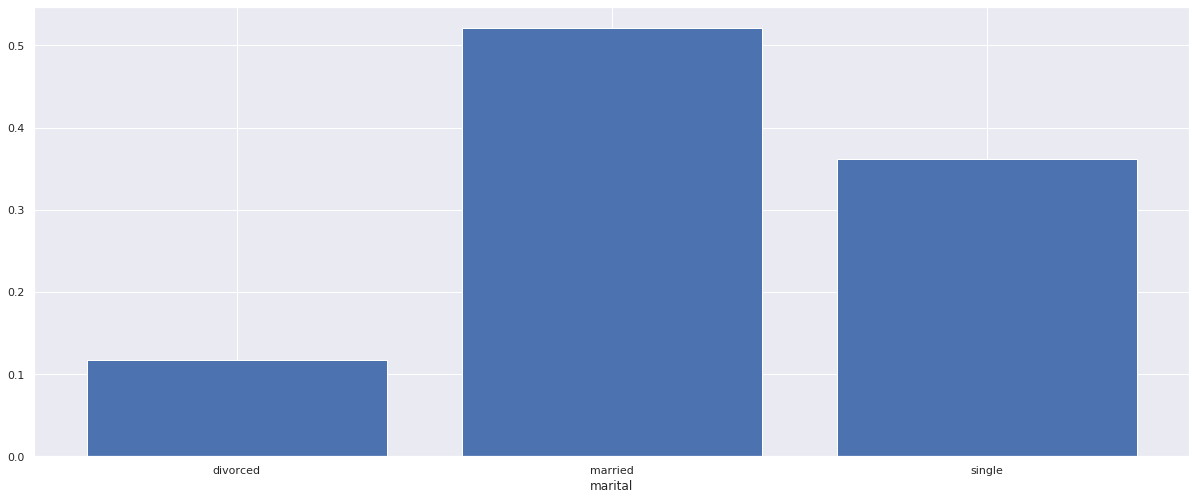

In [0]:
marital_dict = PercentileCalc(bank_data['marital'], 'marital')
PlotDict(marital_dict, 'marital')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


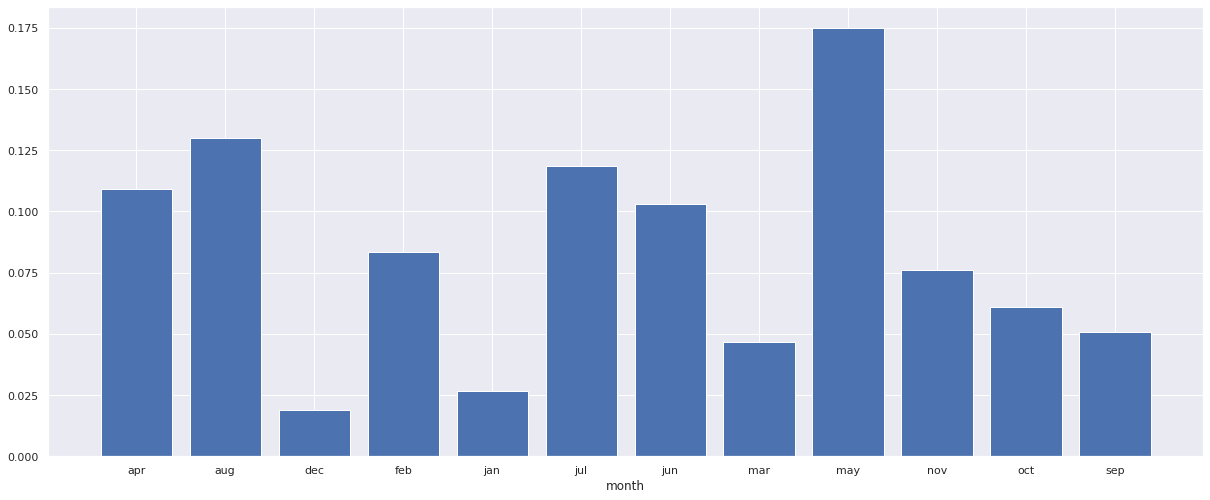

In [0]:
month_dict = PercentileCalc(bank_data['month'], 'month')
PlotDict(month_dict, 'month')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


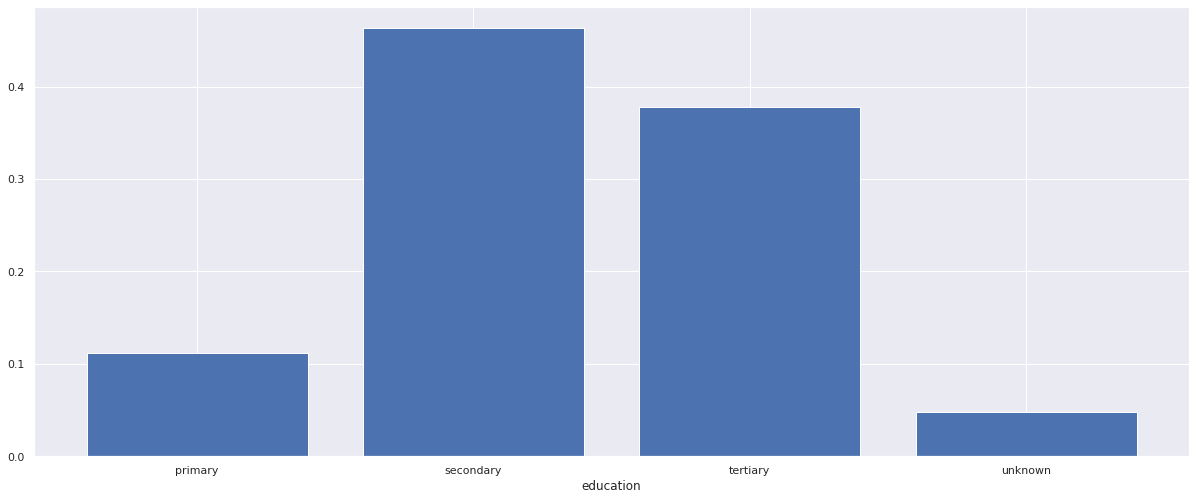

In [0]:
education_dict = PercentileCalc(bank_data['education'], 'education')
PlotDict(education_dict, 'education')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


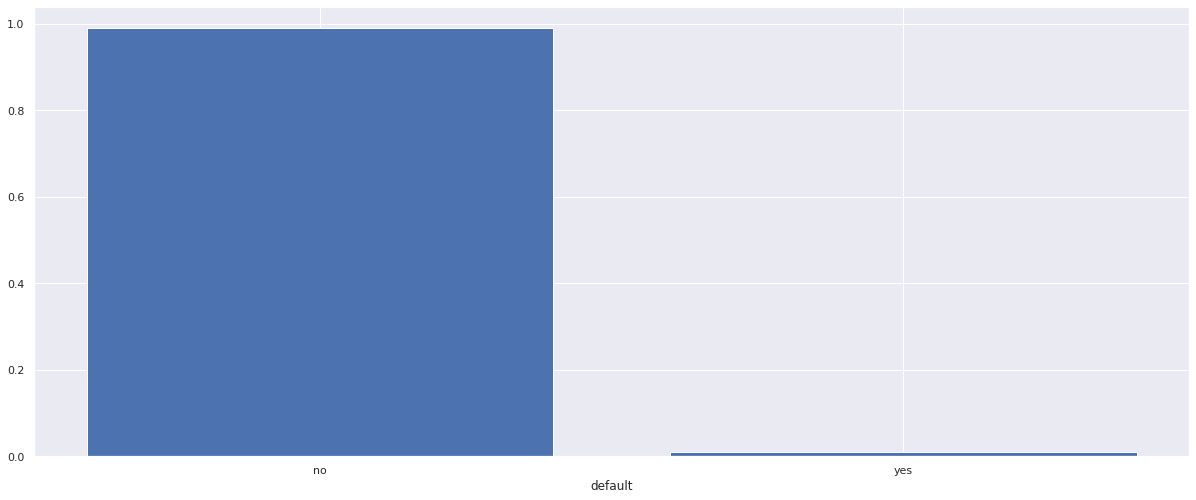

In [0]:
default_dict = PercentileCalc(bank_data['default'], 'default')
PlotDict(default_dict, 'default')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


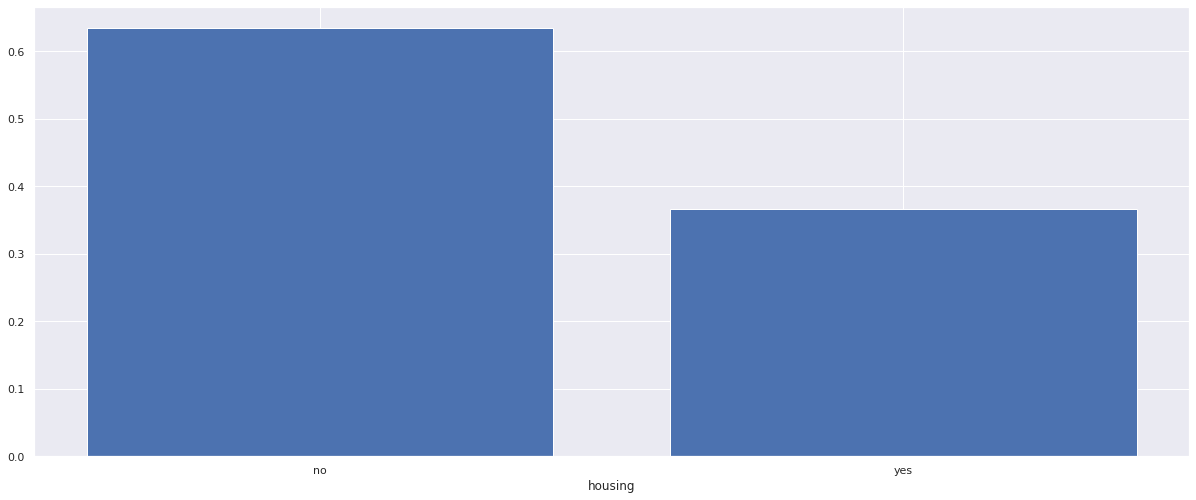

In [0]:
housing_dict = PercentileCalc(bank_data['housing'], 'housing')
PlotDict(housing_dict, 'housing')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


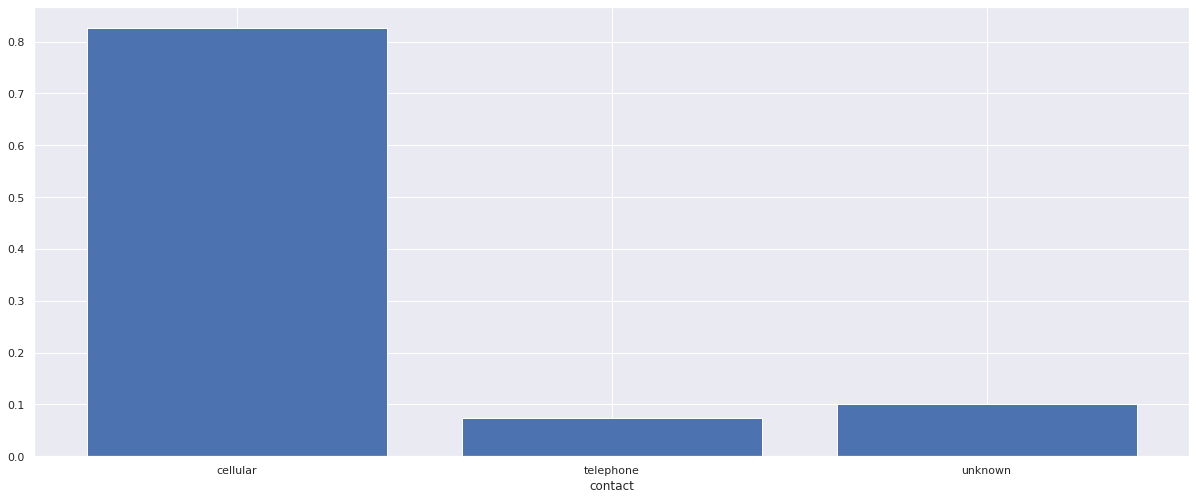

In [0]:
contact_dict = PercentileCalc(bank_data['contact'], 'contact')
PlotDict(contact_dict, 'contact')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


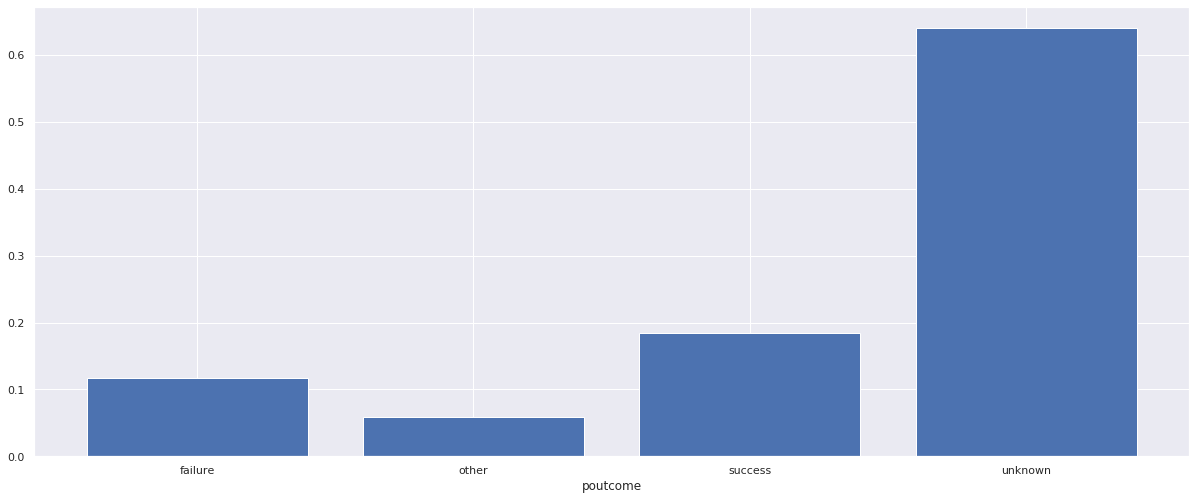

In [0]:
poutcome_dict = PercentileCalc(bank_data['poutcome'], 'poutcome')
PlotDict(poutcome_dict, 'poutcome')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


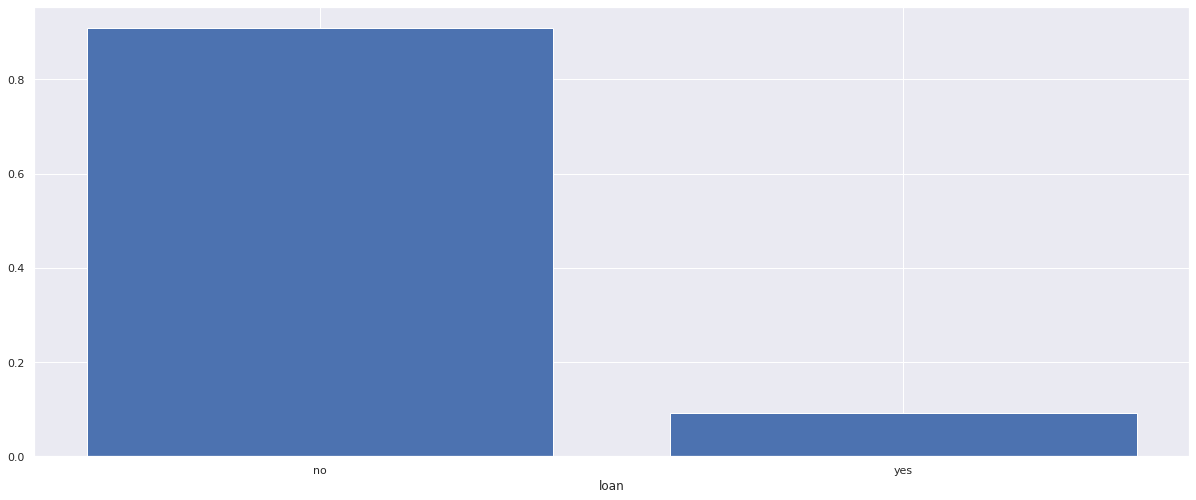

In [0]:
loan_dict = PercentileCalc(bank_data['loan'], 'loan')
PlotDict(loan_dict, 'loan')

In [0]:
y = bank_data['y']
LE = LabelEncoder()
LE.fit(y)
success = LE.fit_transform(y)
bank_data['success'] = success


In [0]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous,success
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
success,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


## 2 - Resposta
Podemos ver, através da análise gráfica e pelos dados de correlação expostos na tabela acima que alguns dados são muito mais relevantes para que o alvo da campanha seja um sucesso. Observe, por exemplo, a correlação entre a duração das chamadas e a resposta do cliente. Vemos também que a maioria esmagadora dos clientes que atenderam à campanha não tinham um empréstimo pessoal, foram contactados por telefone celular, não possuía crédito e eram solteiros ou casados. Muitos destes dados indicam o perfil dos clientes que são alvos de uma campanha bem sucedida de empréstimos. 
O perfil é de pessoas que não têm tanto dinheiro em caixa, vemos pela ausência de crédito, apesar do vencimento anual não ser uma variável preponderante, uma vez que a correlação da coluna *balance* com *LE_y* ser quase nula, demonstrando que os clientes que acatam a oferta de empréstimo não ganham pouco, mas administram mal seus bens.
Um possível nível de desinformação, veja pelo nível de escolaridade de quem tomou o empréstimo. 
Além da situação financeira e pessoal de cada cliente, vemos o impacto da duração das chamadas como sendo um fator impactante, além do fato de o cliente não possuir empréstimo e/ou crédito anteriormente, ser quase definidor. 

# 3 - Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

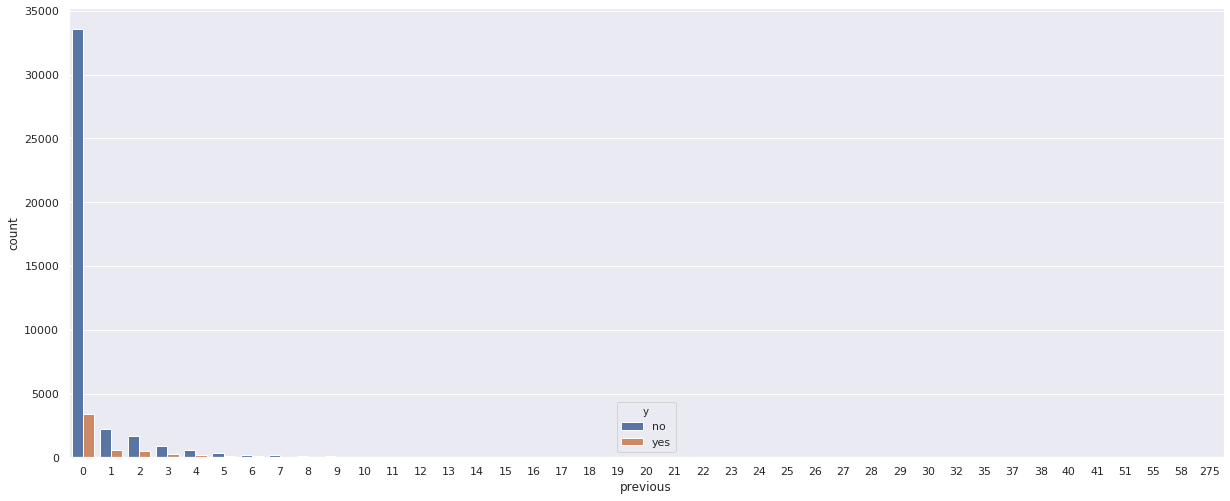

In [0]:
ax = sns.countplot(x="previous", hue="y", data=bank_data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


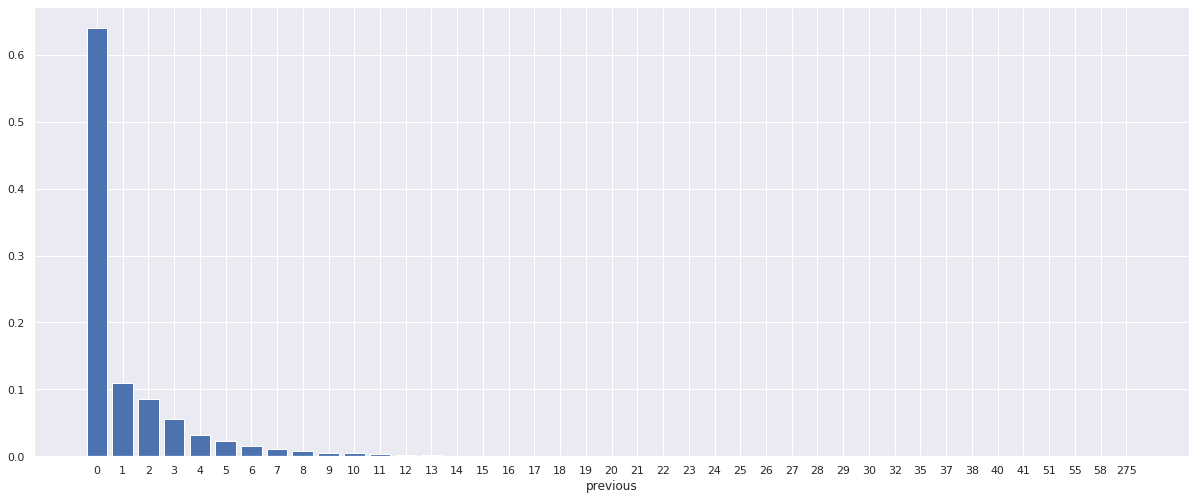

In [0]:
previous_dict = PercentileCalc(bank_data['previous'], 'previous')
PlotDict(previous_dict, 'previous')

In [0]:
print(previous_dict)

{0: 0.6398184912081679, 1: 0.11022877670637171, 2: 0.08621667612024958, 3: 0.055587067498581964, 4: 0.03233125354509359, 5: 0.02287767063717149, 6: 0.015692947627150688, 7: 0.01020986954055587, 8: 0.00737379466817924, 9: 0.004537719795802609, 10: 0.004915863112119494, 11: 0.0028360748723766306, 12: 0.0018907165815844206, 13: 0.0017016449234259785, 14: 0.0009453582907922103, 15: 0.00018907165815844205, 16: 0.0, 17: 0.0005672149744753261, 18: 0.0, 19: 0.0003781433163168841, 20: 0.00018907165815844205, 21: 0.00018907165815844205, 22: 0.00018907165815844205, 23: 0.00018907165815844205, 24: 0.0, 25: 0.0, 26: 0.00018907165815844205, 27: 0.0, 28: 0.0, 29: 0.00018907165815844205, 30: 0.00018907165815844205, 32: 0.0, 35: 0.0, 37: 0.0, 38: 0.0, 40: 0.0, 41: 0.0, 51: 0.0, 55: 0.00018907165815844205, 58: 0.00018907165815844205, 275: 0.0}


## 3 - Resposta
Graficamente e analíticamente, visto no *print* do dicionário *previous_data*, apenas $5\%$ dos contactados cederam à proposta na terceira ligação, sendo as ligações subsequentes com menos eficiência, quase inexpressivas. Assim sendo, eu colocaria o número médio de ligações para três e o número máximo para 5, visto que, com 3 ligações foram contemplados mais de $88\%$ dos que efetivaram o empréstimo, enquanto que, após a quinta ligação, restam menos de $7\%$ dos possíveis clientes. É mais efetivo redirecionar o funcionário que insistiria em um cliente que recusou várias ligações para um novo possível cliente.

# 4 - O resultado da campanha anterior tem relevância na campanha atual?

In [0]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous,success
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
success,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


## 4 - Resposta
Essencialmente não tem, voltando à matriz de correlação, veja novamente o plot acima, temos que o índice de correlação entre os contatos da campanha passada e o sucesso desta é muito próximo de 0, sendo, inclusive, negativo. Isso indica que os dados não tem uma correlação forte, e, se tiverem, não é uma correlação que ajuda o objetivo do banco, uma vez que a correlação é negativa.  

# 5 - Qual o fator determinante para que o banco exija um seguro de crédito?

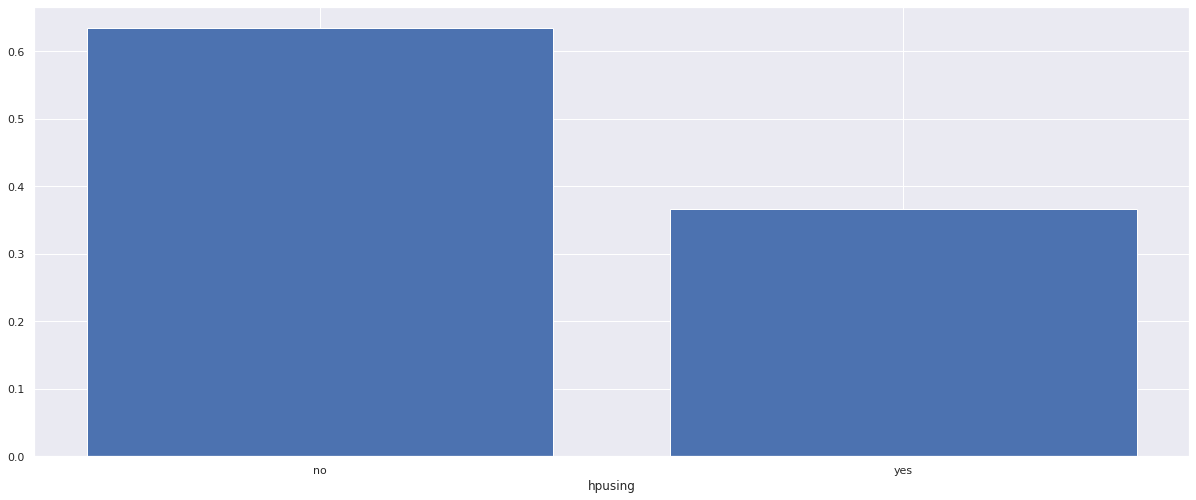

In [0]:
# housing plot
PlotDict(housing_dict, 'hpusing')

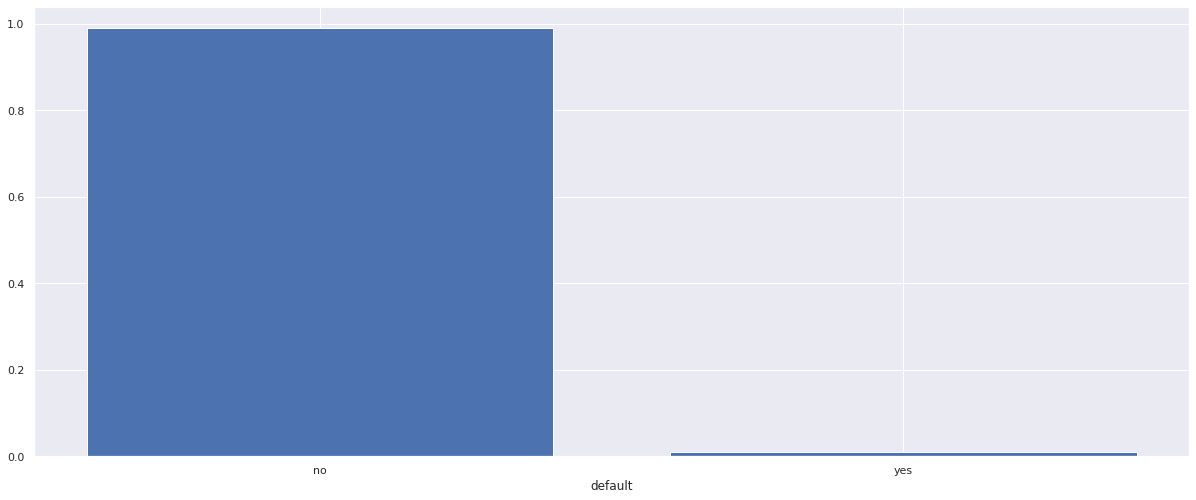

In [0]:
# credit default plot
PlotDict(default_dict, 'default')

## 5 - Resposta
O critério óbvio e imediato é o histórico de inadimplência do cliente, visto na coluna *default*, que descreve se há Incumprimento de Crédito por parte do cliente. Além disso, sabendo os vencimentos totais do cliente, é possível prever alguma inadimplência a depender do valor do empréstimo. Apesar da falta de correlação entre o venciemnto anual e a necessidade do empréstimo, discutida em item anterior, é razoável que se observe isso antes do seguro de crédito.
Além disso, observar se há algum tipo de empréstimo relacionado à moradia, como descrito em *housing*, porque em caso de inadimplência, o imóvel pode ser tomado como um bem. No caso de haver um empréstimo à habitação, tal bem não está disponível. Ambos seriam os casos que responderam '*yes*'.

# 6 - Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [0]:
housing_mask = [ans for ans in bank_data['housing'] == 'yes']
bank_housing_weighted = bank_data[housing_mask]
bank_housing_weighted.shape

(25130, 18)

In [0]:
housing_and_target_mask = [ans for ans in bank_housing_weighted['y'] == 'yes']
housing_and_target = bank_housing_weighted[housing_and_target_mask]
housing_and_target.shape

(1935, 18)

In [0]:
default_mask = [ans for ans in bank_data['default'] == 'yes']
bank_default_weighted = bank_data[default_mask]
bank_default_weighted.shape

(815, 18)

In [0]:
default_and_target_mask = [ans for ans in bank_default_weighted['y'] == 'yes']
default_and_target = bank_default_weighted[default_and_target_mask]
default_and_target.shape

(52, 18)

## 6 - Resposta
Como dito antes, percebemos alguns padrões que podem ser aprofundados. Veja acima que 25130 pessoas possuem empréstimo à habitação, entretanto, estes são minoria dentre os que aceitam o empréstimo novo, 1935 precisamente, mostrando que pessoas que já possume um empréstimo em curso, estão mais propensas à recusar um novo empréstimo. 
Da mesma forma, pessoas que possuem crédito incumprido se mostram menos responsivas à campanha de crédito, sendo isso muito preponderante, uma vez que das 815 pessoas que possuem crédito incumprido, apenas 52 responderam positivamente à campanha.